In [225]:
trace_file = "traces/trace_c3_v0"

In [226]:
# Read in and pre-process trace file
with open(trace_file) as f:
    content = f.readlines()
content = [x.strip() for x in content] 
num_header_lines = 4
content = content[num_header_lines:]

def is_an_allocation(v):
    return (v[0] == 'a')

def is_a_free(v):
    return (v[0] == 'f')

# Data wrangle into dicts and lists
allocations_dict = dict()
allocations_indices = dict()
freed_dict = dict()

freed_order = []
alloc_order = []

for i, v in enumerate(content):
    v = v.split(" ")
    if is_an_allocation(v):
        allocations_indices[v[1]] = v[2]
        alloc_order.append(int(v[2]))
        if v[2] not in allocations_dict:
            allocations_dict[v[2]] = 1
        else:
            allocations_dict[v[2]] += 1
    elif is_a_free(v):
        if v[1] not in freed_dict:
            freed_dict[v[1]] = 'freed'
            freed_order.append(int(v[1]))


In [227]:
# print in order of most frequent allocations
for key, value in sorted(allocations_dict.iteritems(), key=lambda (k,v): (-v,k)):
    print "%s: %s" % (key, value)

512: 940
64: 940
448: 936
10122: 1
10382: 1
11269: 1
11665: 1
11852: 1
11876: 1
12104: 1
12544: 1
13596: 1
13727: 1
14711: 1
15322: 1
16158: 1
16340: 1
16586: 1
16834: 1
1717: 1
17454: 1
17686: 1
17706: 1
17769: 1
17966: 1
18441: 1
18803: 1
18844: 1
18925: 1
18990: 1
19474: 1
19836: 1
19949: 1
20476: 1
21096: 1
21580: 1
21640: 1
22666: 1
22741: 1
23109: 1
23219: 1
23300: 1
23342: 1
23804: 1
24638: 1
24889: 1
24934: 1
2524: 1
26382: 1
26734: 1
26800: 1
27508: 1
27751: 1
28042: 1
29307: 1
30253: 1
30307: 1
30354: 1
30528: 1
30880: 1
3492: 1
3737: 1
3805: 1
3997: 1
5248: 1
5450: 1
5536: 1
6239: 1
7019: 1
9001: 1
9698: 1


In [228]:
# convert each key to ints, so can sort
# for some reason can't start out with ints, and increment the values.  this works.

for key in allocations_dict:
    val = allocations_dict[key]
    del allocations_dict[key]
    allocations_dict[int(key)] = val

for key in freed_dict:
    val = freed_dict[key]
    del freed_dict[key]
    freed_dict[int(key)] = val

In [229]:
# list form of allocation amounts and counts, and totals, since plays nicer with matplotlib
allocation_amounts = []
allocation_counts = []
allocation_totals = []

for key in sorted(allocations_dict.iterkeys()):
    allocation_amounts.append(key)
    allocation_counts.append(allocations_dict[key])
    allocation_totals.append(int(allocations_dict[key]*key))
    

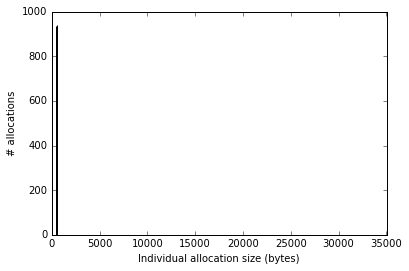

In [230]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N = len(allocation_amounts)

ind = np.arange(N)  # the x locations for the groups
width = 1.0         # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(allocation_amounts, allocation_counts, width, color='r')
plt.xlabel('Individual allocation size (bytes)')
plt.ylabel('# allocations')
plt.show()

# num times allocated vs. individual allocation size

# This plot shows you which types of allocations are most frequent

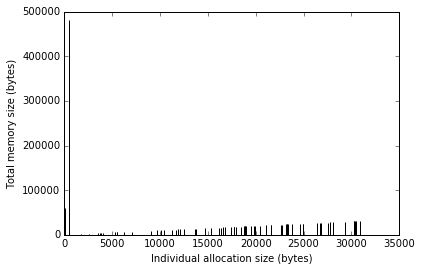

In [231]:
ind = np.arange(N)  # the x locations for the groups
width = 1.0         # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(allocation_amounts, allocation_totals, width, color='r')
plt.xlabel('Individual allocation size (bytes)')
plt.ylabel('Total memory size (bytes)')
plt.show()

# total memory size vs. individual allocation size

# This plot shows you which types of allocations are taking up the most memory

In [232]:
# See if there was anything left unfreed

# copy over dict
left_at_end_allocations_dict = dict()
for key in allocations_dict:
    left_at_end_allocations_dict[str(key)] = allocations_dict[key]

# subtract
for key in freed_dict:
    if str(key) in allocations_indices:
        amount = allocations_indices[str(key)]
        left_at_end_allocations_dict[str(amount)] -= 1
        if left_at_end_allocations_dict[amount] == 0:
            del left_at_end_allocations_dict[amount]
        
print left_at_end_allocations_dict

{}


In [233]:
# Calculate header overhead

HEADER_SIZE_BYTES = 32

print "Total # allocations:", sum(allocation_counts)
print "Total cumulative allocation size (bytes):", sum(allocation_totals)
print "Total size allocated for headers:", sum(allocation_counts)*HEADER_SIZE_BYTES

# This is how much is wasted on headers 
print "Header overhead is (percent):", 100*sum(allocation_counts)*32.0/sum(allocation_totals)


Total # allocations: 2884
Total cumulative allocation size (bytes): 2151442
Total size allocated for headers: 92288
Header overhead is (percent): 4.28958809952


In [234]:
## Free order
# print freed_order
# This is realively useless to look at but is what is provided natively in the trace file

In [235]:
## Alloc order
print alloc_order
# This list shows, in order of when they were allocated, all of the allocation sizes

[64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 12544, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 512, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 21580, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 1717, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 512, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 18844, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448, 64, 448,

In [236]:
## Freed order by amount
freed_order_by_amount = []
for i,v in enumerate(freed_order):
    amount = alloc_order[int(freed_order[i])]
    freed_order_by_amount.append(amount)

print freed_order_by_amount
# This is very useful to look at -- this shows the individual free amounts in order of when they were freed

[12544, 1717, 512, 512, 18844, 512, 22741, 11852, 20476, 64, 448, 21580, 26734, 10122, 64, 448, 11876, 11269, 30253, 64, 512, 64, 19949, 18803, 15322, 5450, 512, 16158, 23342, 512, 64, 3492, 18990, 512, 448, 512, 30354, 448, 64, 512, 19836, 448, 512, 64, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 64, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 64, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 13727, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 

In [237]:
# Example, how much is allocated in the last 30 allocations?
print sum(alloc_order[-30:])

283733


In [238]:
# Find what percent of allocations are small, vs. large

SMALL_ALLOCATION_SIZE = 512

# Count how many are un
unique_small_alloc_sizes = 0
for i in allocation_amounts:
    if (i < SMALL_ALLOCATION_SIZE):
        unique_small_alloc_sizes += 1

print sum(allocation_totals[0:unique_small_alloc_sizes]), "bytes are in small allocations"
print sum(allocation_totals[unique_small_alloc_sizes:]), "bytes are in large allocations"

ratio =  sum(allocation_totals[3:])/(sum(allocation_totals[0:3])*1.0+ sum(allocation_totals[3:]))
print ratio*100.0, "percent of memory is in large allocations"


479488 bytes are in small allocations
1671954 bytes are in large allocations
55.3430675798 percent of memory is in large allocations


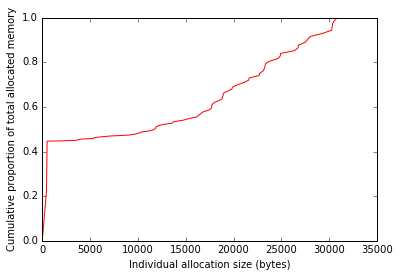

In [243]:
# Plot cdf (cumulative distribution function) of allocation amounts

total_allocated = sum(allocation_totals)*1.0
cumulative_allocation_percent = []
cumulative_sum = 0.0
for i in allocation_totals:
    cumulative_sum += i/total_allocated
    cumulative_allocation_percent.append(cumulative_sum)

plt.plot(allocation_amounts, cumulative_allocation_percent, color='r')
plt.xlabel('Individual allocation size (bytes)')
plt.ylabel('Cumulative proportion of total allocated memory')
plt.show()

# Cumulative proportion of total allocated memory  vs. individual allocation size

# This plot shows a richer view of how much of allocations are small vs. large

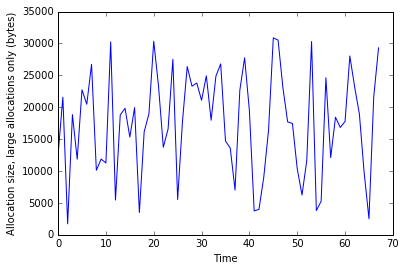

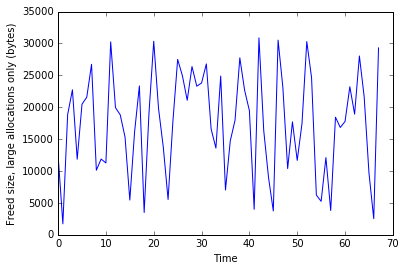

68 allocations are large
1717 bytes is the smallest 'large' allocation


In [240]:
# Filter for only large allocations

alloc_order_large_only = []
for i in alloc_order:
    if i > SMALL_ALLOCATION_SIZE:
        alloc_order_large_only.append(i)
        
freed_order_by_amount_large_only = []
for i in freed_order_by_amount:
    if i > SMALL_ALLOCATION_SIZE:
        freed_order_by_amount_large_only.append(i)

plt.plot(alloc_order_large_only)
plt.xlabel('Time')
plt.ylabel('Allocation size, large allocations only (bytes)')
plt.show()

plt.plot(freed_order_by_amount_large_only)
plt.xlabel('Time')
plt.ylabel('Freed size, large allocations only (bytes)')
plt.show()

print len(alloc_order_large_only), "allocations are large"
print min(alloc_order_large_only), "bytes is the smallest 'large' allocation"

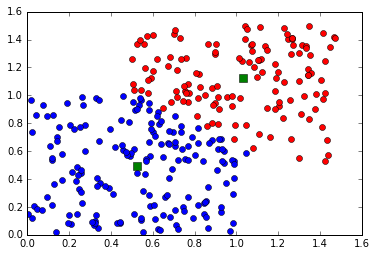

In [241]:
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
from scipy.cluster.vq import kmeans,vq

## Just keeping this as an example of k-means

# data generation
data = vstack((rand(150,2) + array([.5,.5]),rand(150,2)))

# computing K-Means with K = 2 (2 clusters)
centroids,_ = kmeans(data,2)
# assign each sample to a cluster
idx,_ = vq(data,centroids)

# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'or')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

[ 10293.66666667  24574.5         28908.83333333   3169.33333333
  15864.71428571  20045.5          6671.875       13115.6       ]


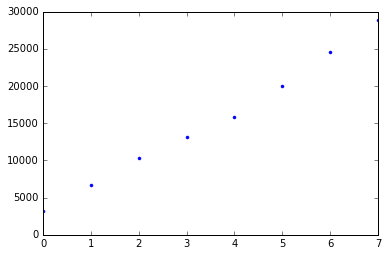

In [242]:
## K-means on the large allocations

K = 8
alloc_order_large_only_floats = []
for i in alloc_order_large_only:
    alloc_order_large_only_floats.append(float(i))
clusters,_ = kmeans(sorted(alloc_order_large_only_doubles),K)
print clusters
plt.plot(sorted(clusters),'.')